In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [21]:
df = pd.read_pickle("../../datasets/processed/gender_classification.pkl")

In [22]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,True,11.8,6.1,True,False,True,True,Male
1,False,14.0,5.4,False,False,True,False,Female
2,False,11.8,6.3,True,True,True,True,Male
3,False,14.4,6.1,False,True,True,True,Male
4,True,13.5,5.9,False,False,False,False,Female


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   long_hair                  5001 non-null   bool    
 1   forehead_width_cm          5001 non-null   float32 
 2   forehead_height_cm         5001 non-null   float32 
 3   nose_wide                  5001 non-null   bool    
 4   nose_long                  5001 non-null   bool    
 5   lips_thin                  5001 non-null   bool    
 6   distance_nose_to_lip_long  5001 non-null   bool    
 7   gender                     5001 non-null   category
dtypes: bool(5), category(1), float32(2)
memory usage: 68.5 KB


In [24]:
df.describe()

,forehead_width_cm,forehead_height_cm
count,5001.000000,5001.000000
mean,13.181484,5.946311
std,1.107128,0.541268
min,11.400000,5.100000
25%,12.200000,5.500000
50%,13.100000,5.900000
75%,14.000000,6.400000
max,15.500000,7.100000


In [25]:
df.describe(exclude=['float32'])

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001,5001,5001,5001,5001,5001
unique,2,2,2,2,2,2
top,True,False,True,False,False,Female
freq,4349,2531,2540,2535,2506,2501


In [26]:
items = list(df.describe(exclude=['float32']).columns)
df.groupby(by=["gender"])[items].sum(items)

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,
Female,2184,287,340,304,304
Male,2165,2183,2200,2162,2191


Plots

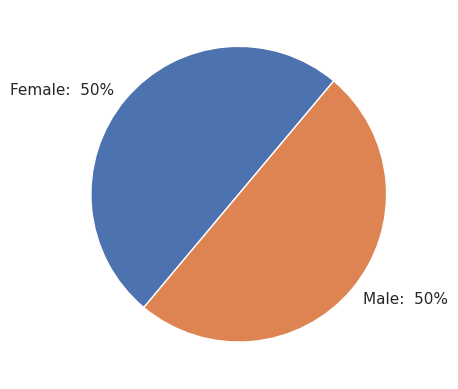

In [27]:
female = sum(df.gender == 'Female')
male = sum(df.gender == 'Male')
plt.pie([female, male], labels=[f'Female: {female/(female+male)*100: .0f}%', f'Male: {male/(female+male)*100: .0f}%'], startangle = 50)
plt.show() 

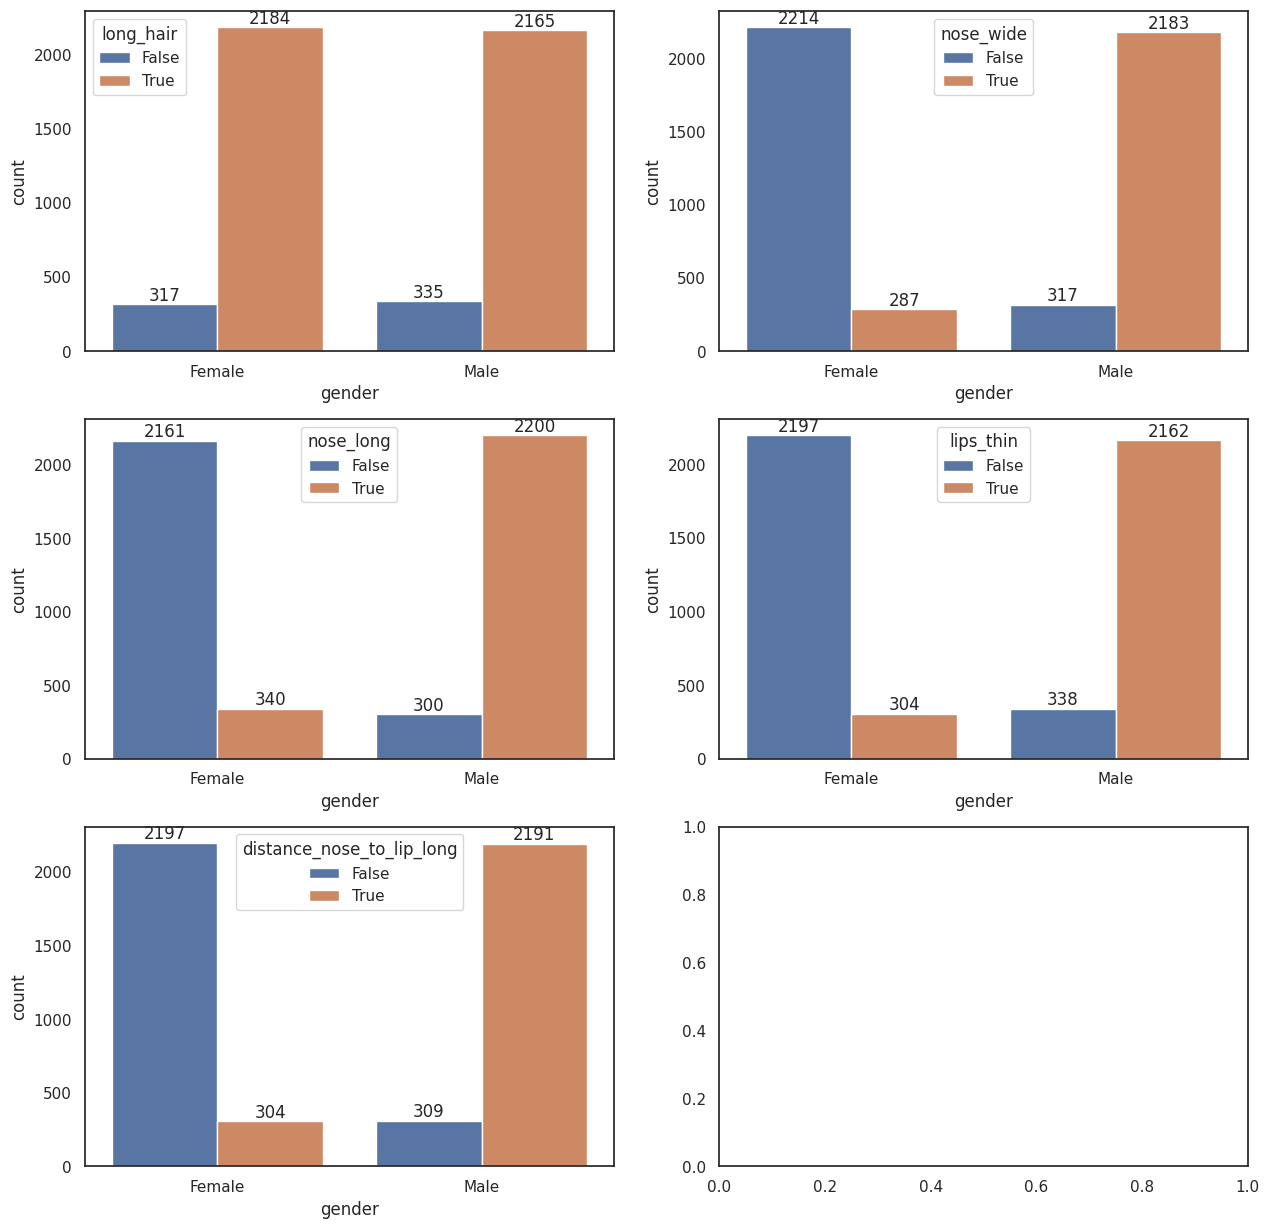

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
items = {
    "long_hair": ax[0][0], 
    "nose_wide": ax[0][1],
    "nose_long": ax[1][0],
    "lips_thin": ax[1][1], 
    "distance_nose_to_lip_long": ax[2][0],
}

for nome, ax in items.items():
    sns.countplot(data=df, x = 'gender', hue=nome, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
        
plt.show()

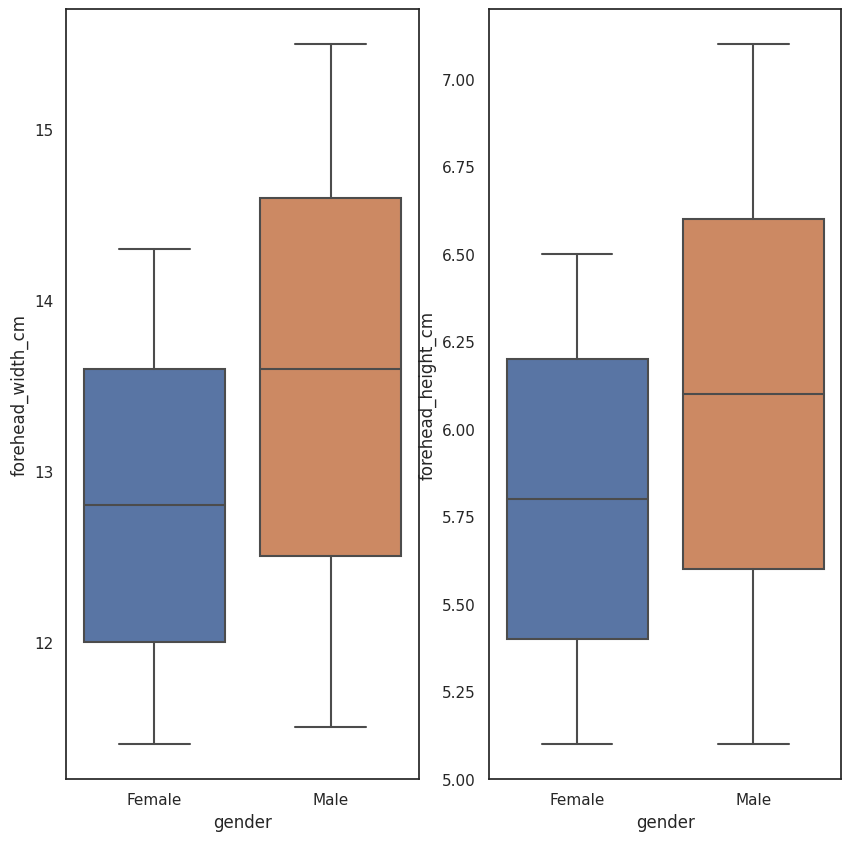

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
items = {
    "forehead_width_cm": ax[0], 
    "forehead_height_cm": ax[1]
}

for nome, ax in items.items():
    sns.boxplot(data=df, x='gender', y=nome, orient="v", ax=ax)
    
plt.show()

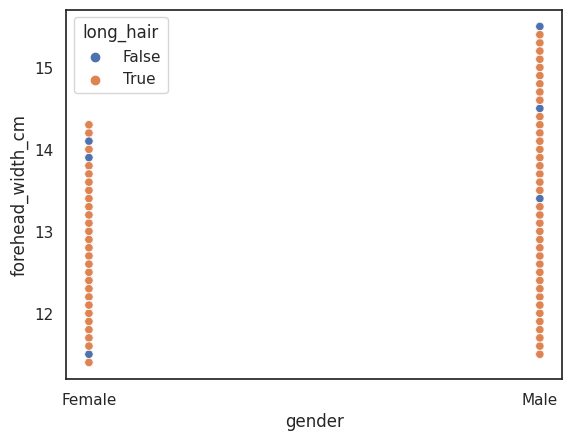

In [30]:
sns.scatterplot(data = df, x='gender', y='forehead_width_cm', hue='long_hair')
plt.show()

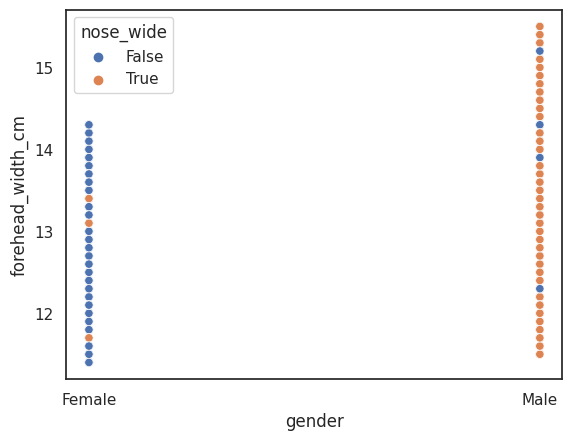

In [31]:
sns.scatterplot(data = df, x='gender', y='forehead_width_cm', hue='nose_wide')
plt.show()

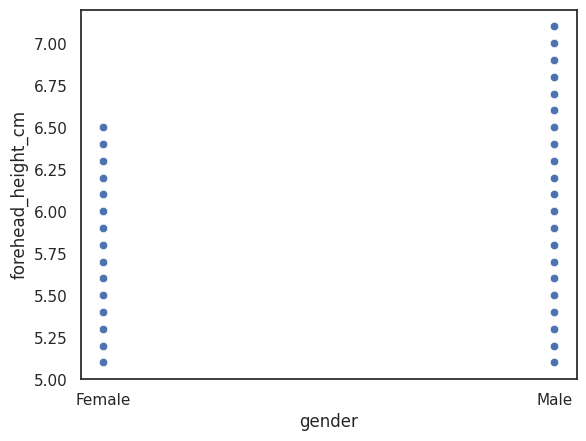

In [32]:
sns.scatterplot(data = df, x='gender', y='forehead_height_cm')
plt.show()

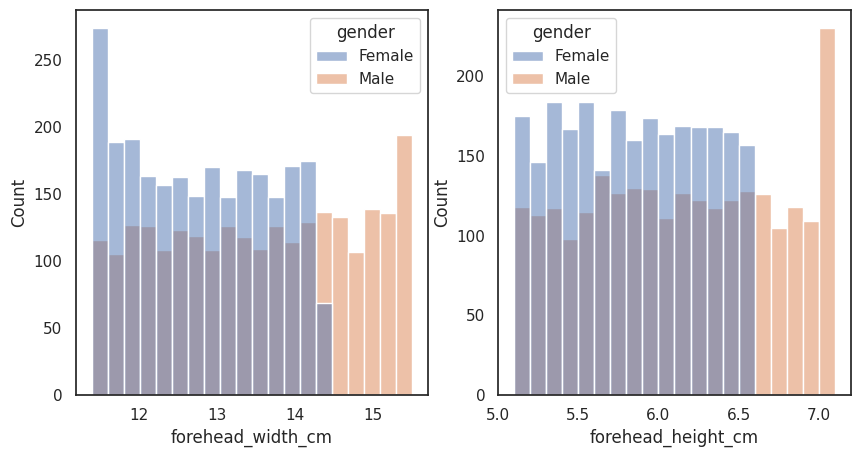

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
items = {
    "forehead_width_cm": ax[0], 
    "forehead_height_cm": ax[1]
}

for nome, ax in items.items():
    sns.histplot(data=df, x=nome, hue='gender', ax=ax)
    
plt.show()